# 機械学習 課題1

## 1. 重回帰から単回帰の導出

$N$個の事例からなる単回帰のデータ$\mathcal{D}$がある。

\begin{align}
\mathcal{D} = \left\{(x_1, y_1), (x_2, y_2), \dots, (x_N, y_N)\right\} = \left\{(x_i, y_i)\right\}_{i=1}^{N}
\end{align}

ただし、$x_1, x_2, \dots, x_N \in \mathbb{R}$、$y_1, y_2, \dots, y_N \in \mathbb{R}$である。計画行列$\pmb{X} \in \mathbb{R}^{N \times 2}$と目的変数ベクトル$\pmb{y} \in \mathbb{R}^N$を、

$$
\pmb{X} = \begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N
\end{pmatrix}, \;
\pmb{y} = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_N
\end{pmatrix}
$$

とする。$\pmb{X}$と$\pmb{y}$に重回帰のパラメータを求める式、

$$
\pmb{w} = (\pmb{X}^\top \pmb{X})^{-1}\pmb{X}^\top \pmb{y}
$$

を適用し、単回帰のパラメータを求める式（[1. 単回帰](https://chokkan.github.io/mlnote/regression/01sra.html)の式(1.15)と式(1.23)）

\begin{align}
a &= \frac{\overline{xy} - (\overline{x})(\overline{y})}{\overline{x^2} - (\overline{x})^2} \\
b &= \overline{y} - a\overline{x}
\end{align}

を導出できることを示せ。解答はMarkdownセルにMathJaxで記述するか、紙に書いたものを撮影してNotebook内に貼り付けてもよい。

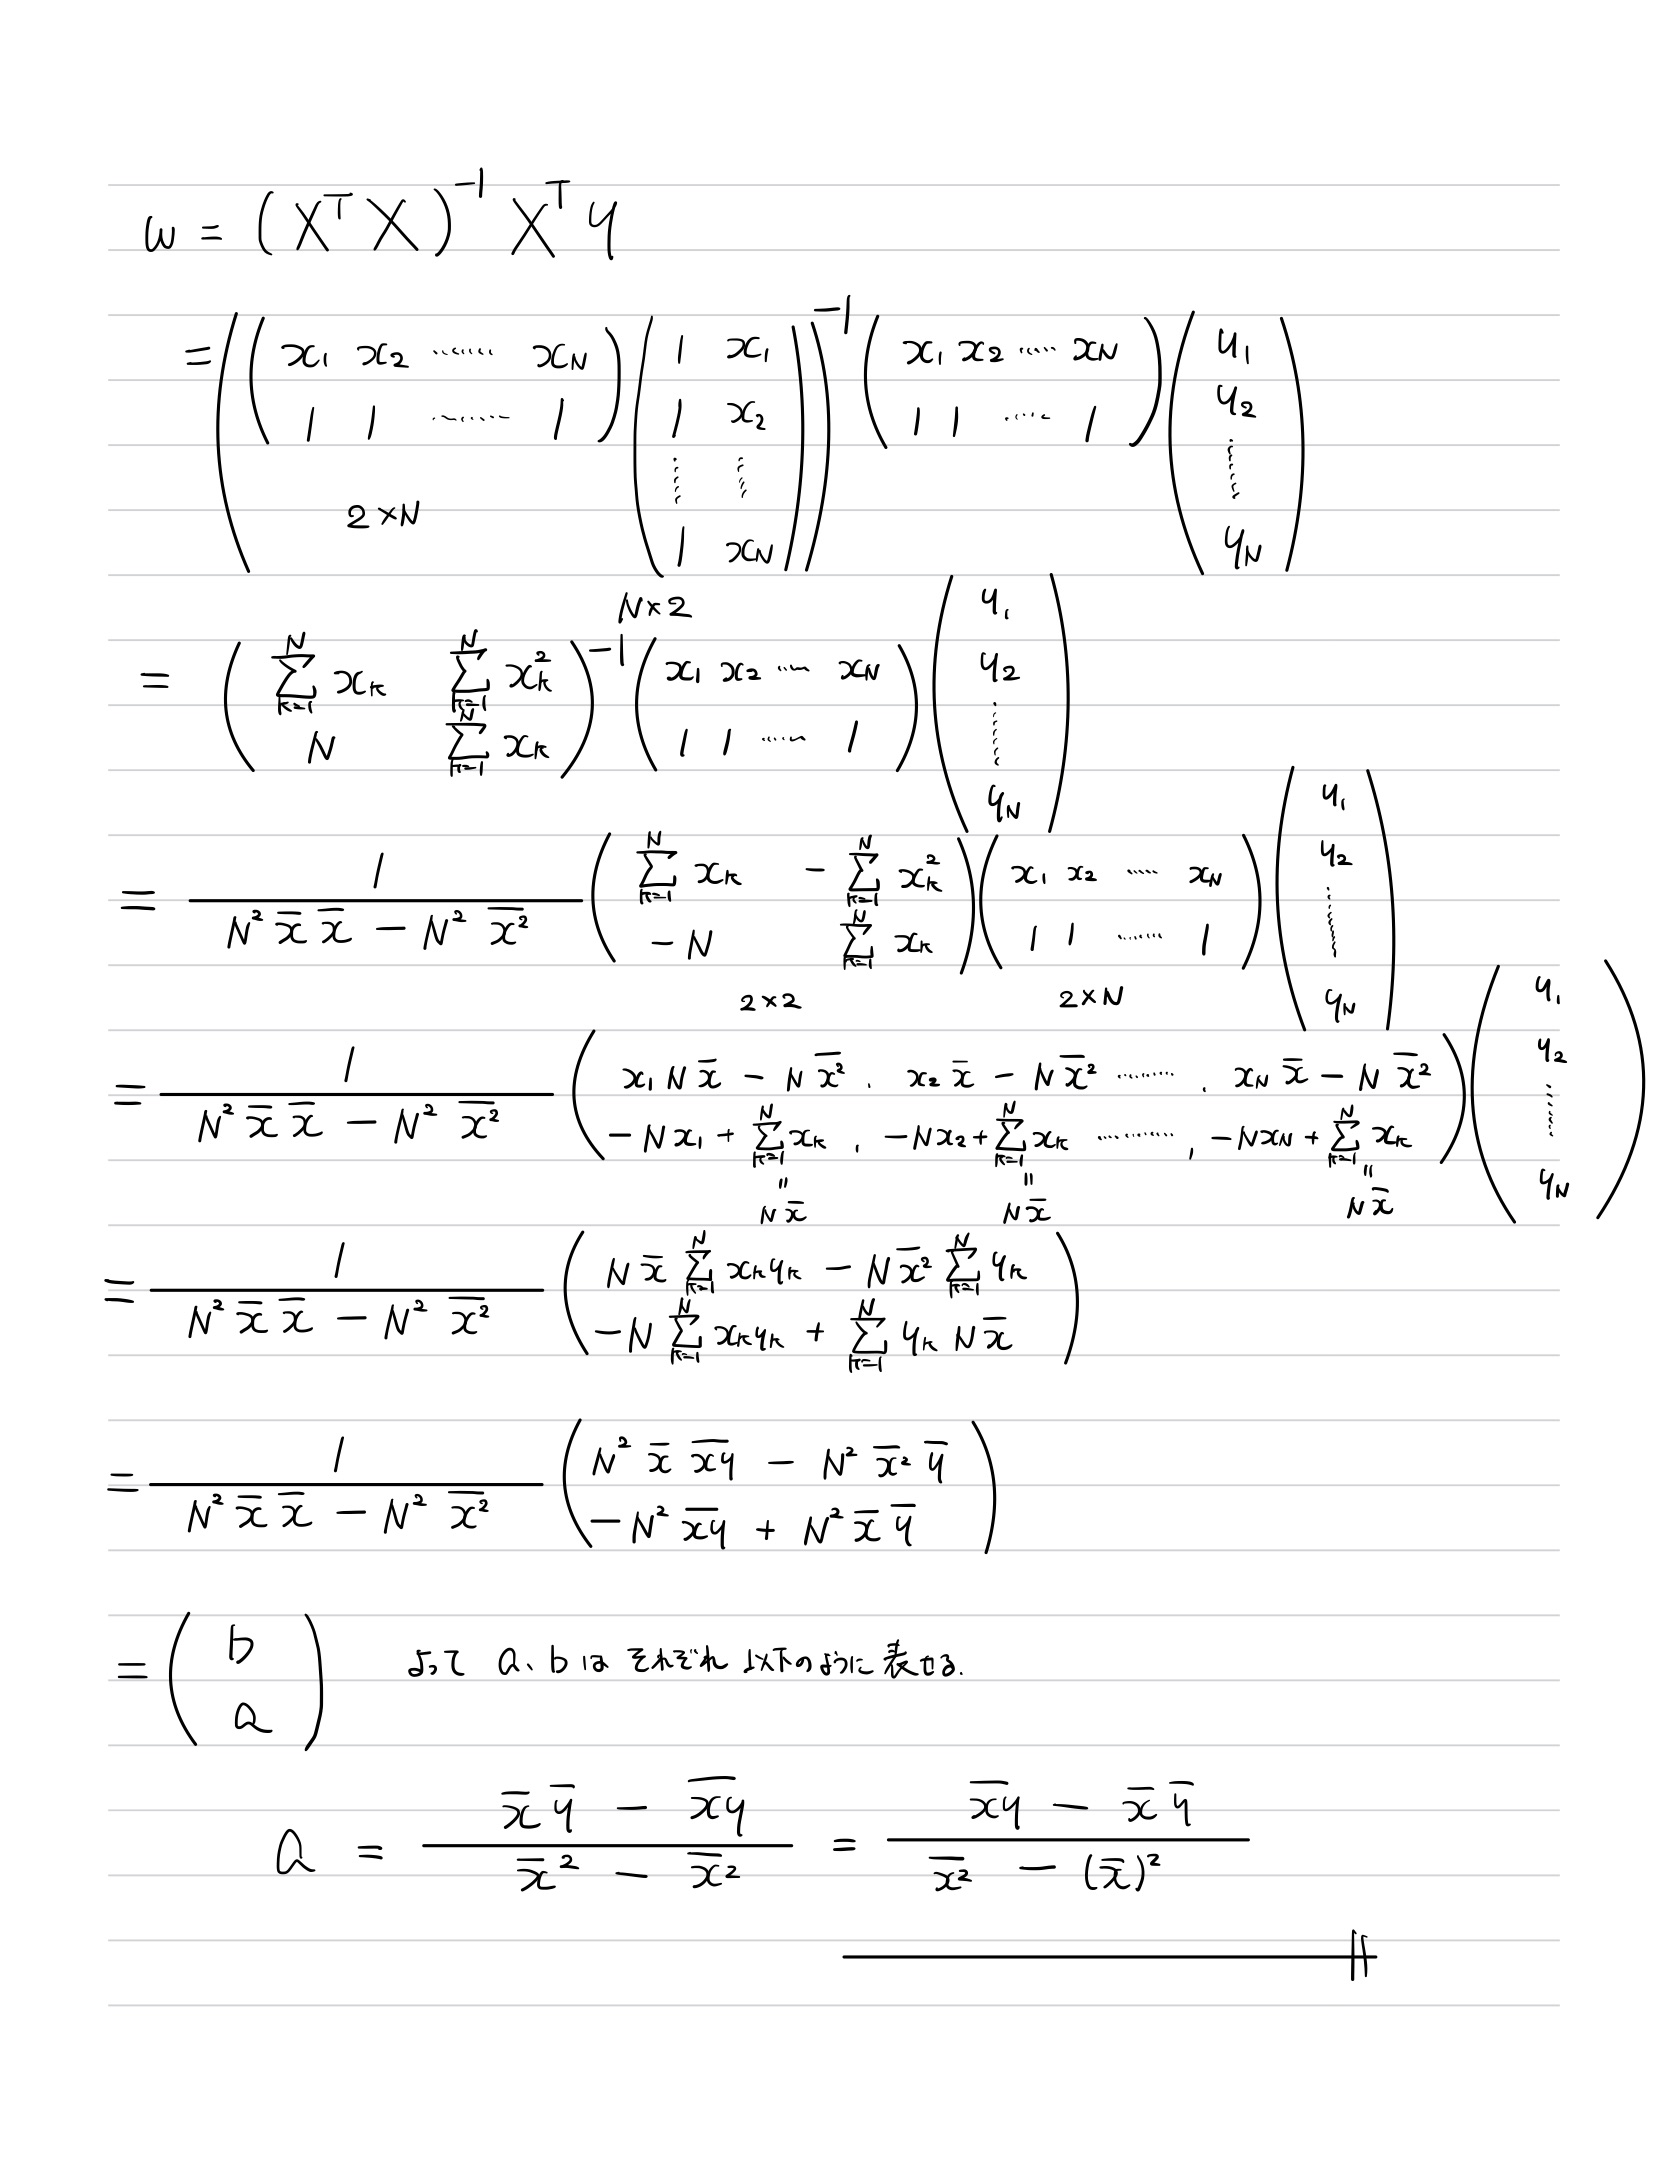

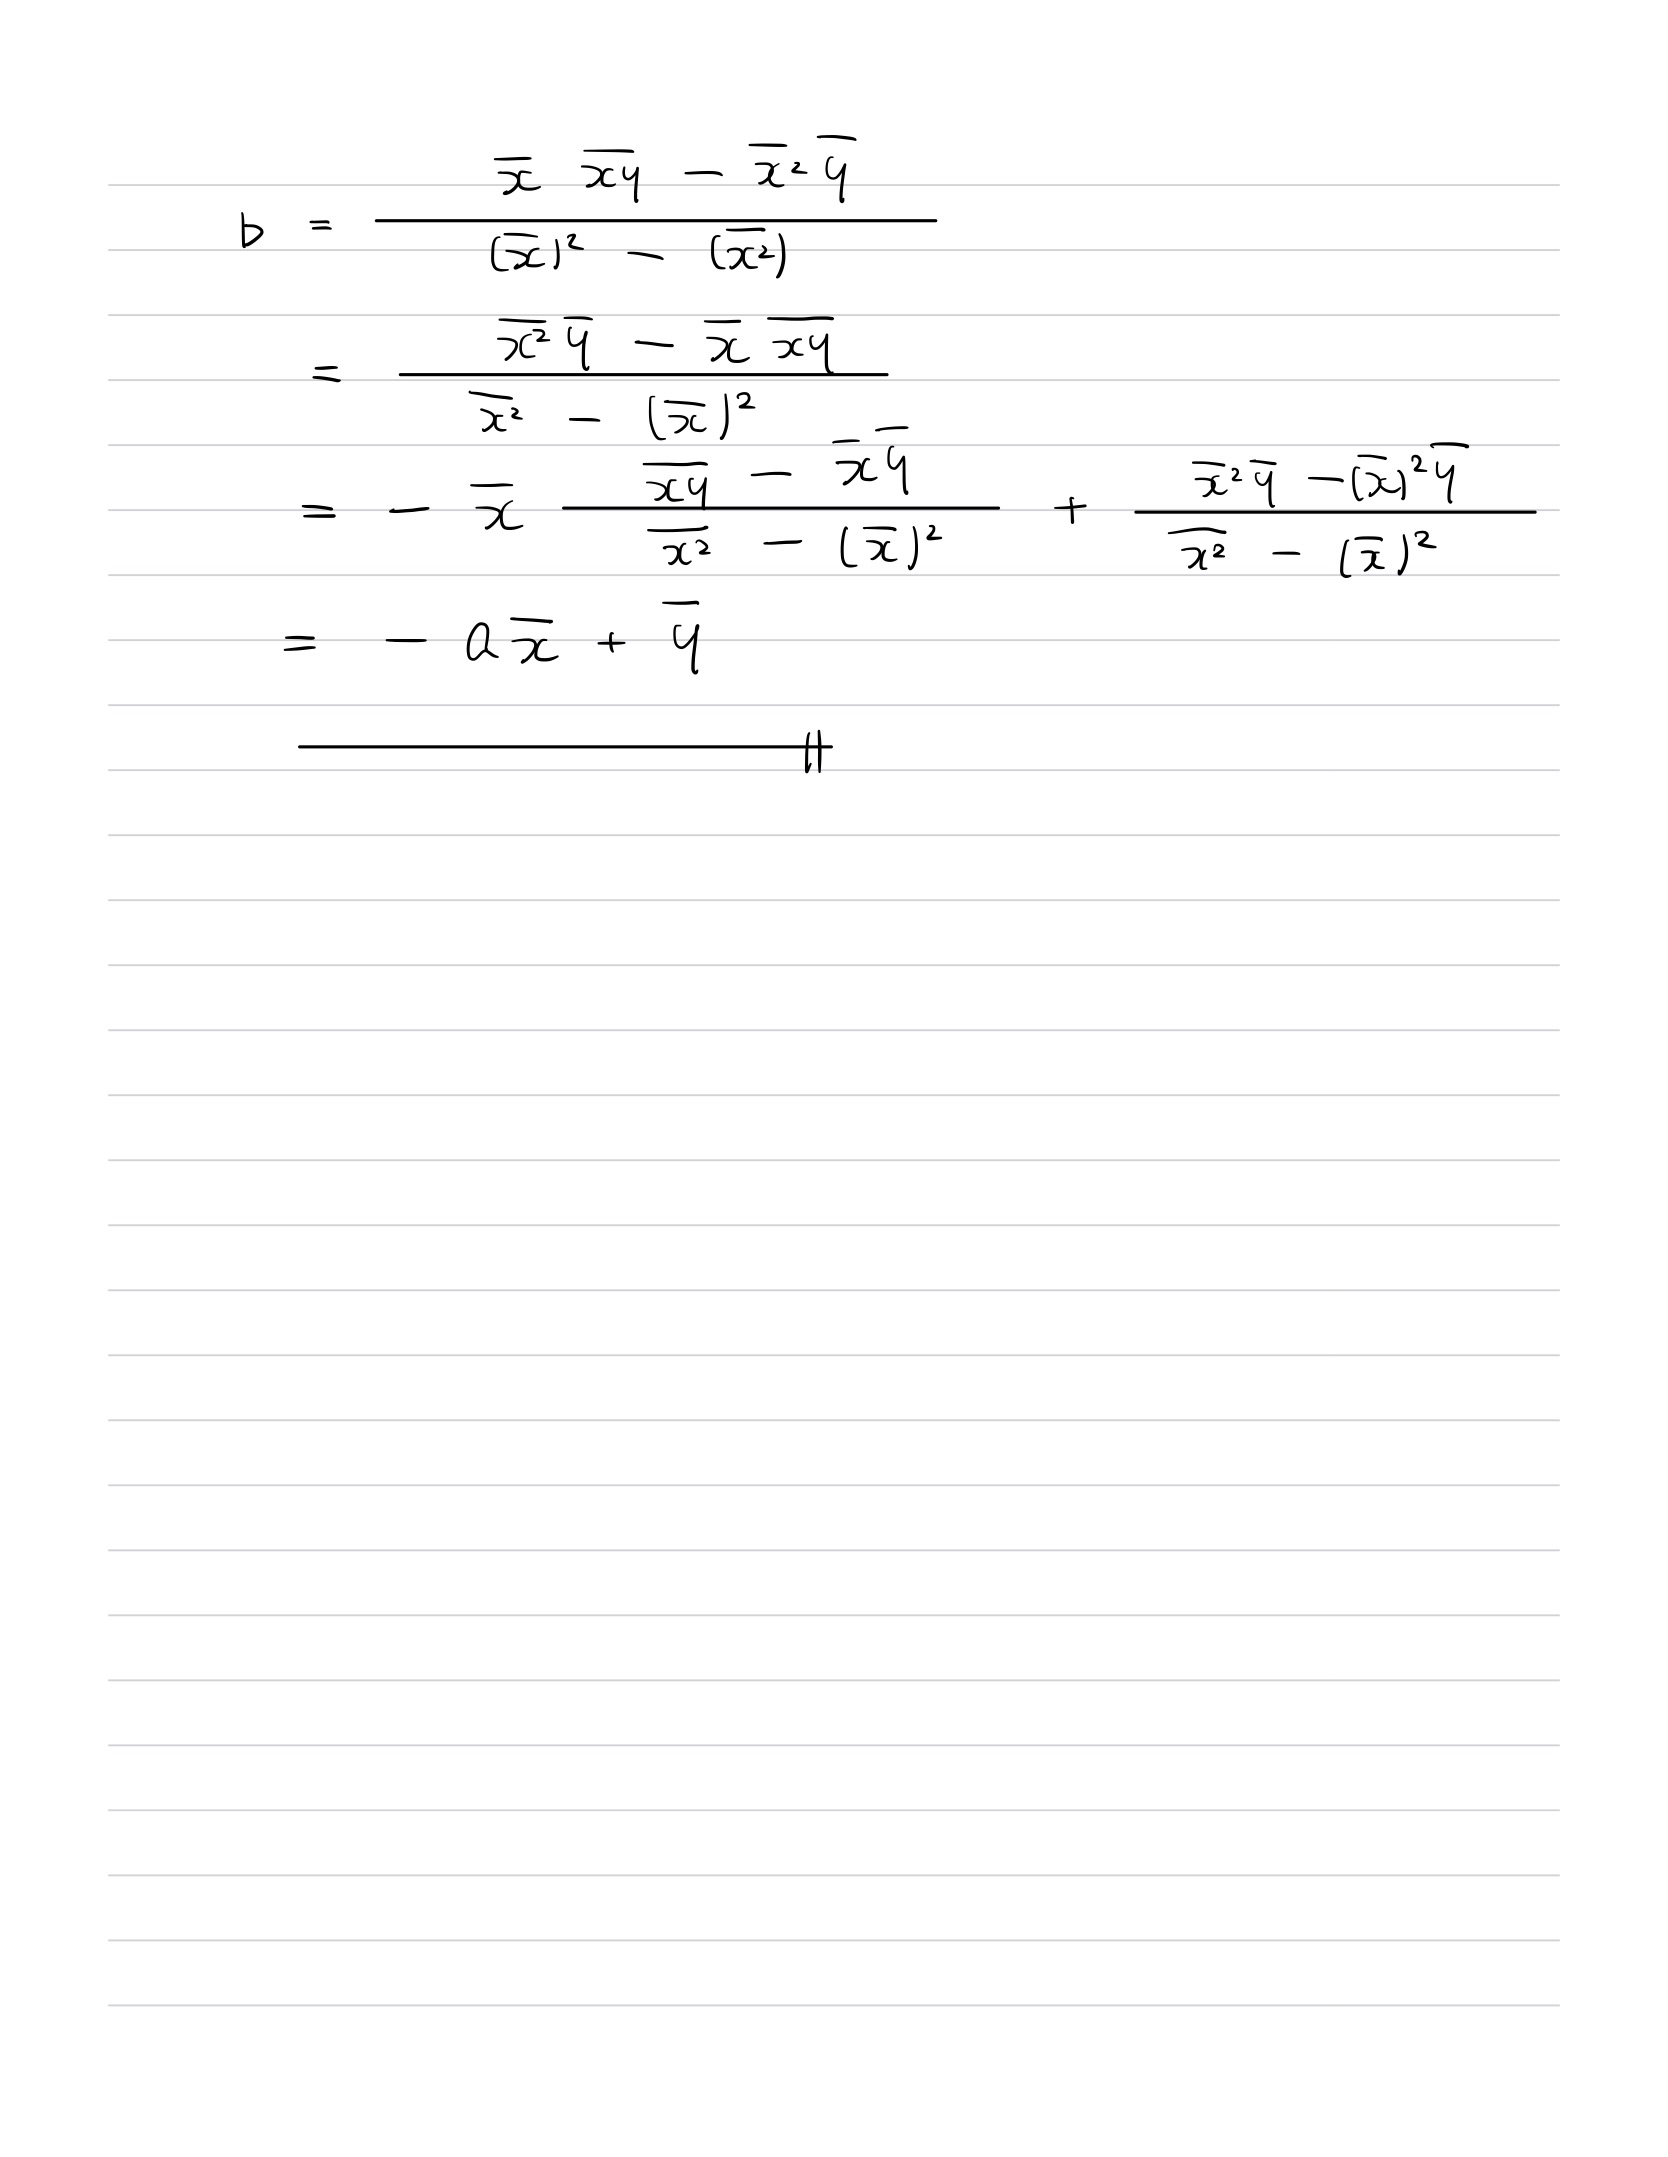

## 2. 回帰分析

総務省統計局が公開している[家計調査 家計収支編 二人以上の世帯](https://www.e-stat.go.jp/stat-search/database?page=1&layout=datalist&toukei=00200561&tstat=000000330001&cycle=1&tclass1=000000330001&tclass2=000000330004&tclass3val=0)と気象庁が公開している[過去の気象データ](https://www.data.jma.go.jp/risk/obsdl/index.php)からデータをダウンロードしたファイルをT2SCHOLAにアップロードした。

+ 東京都区部の品目別消費データ（月次）： FEH_00200561_211218175400.csv
+ 東京の気象データ（月次）： data.csv

この２つのデータを統合したうえで、説明変数と目的変数を適当に選び、回帰分析を実行せよ。評価にあたっては、以下の内容が含まれているかどうかで加点するので、レポートの中で明示せよ。

+ (a) 目的変数と説明変数の説明： 何を目的変数・説明変数として採用したか？
+ (b) ２つのデータを統合し、目的変数と説明変数からなるデータを作成するプログラムとその実行結果（回帰分析を行うデータ）
+ (c) 横軸を月、縦軸を目的変数の値として、目的変数値の推移を表すグラフをプロットするプログラムと、その実行結果（グラフ）
+ (d) 回帰分析を実行するプログラムとその実行結果（実行結果に基づき、回帰式と回帰係数が分かるように説明せよ）
+ (e) 決定係数を求めるプログラムとその実行結果（決定係数が分かるようにせよ）
+ (f) 回帰分析から分かったこと（記述の長さは問わない（短くてもよい））

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import japanize_matplotlib

df_cosumption = pd.read_csv("FEH_00200561_211218175400.csv", encoding = "shift-jis", skiprows=[0,1,2,3,4,5,6,7,8,9,10])
df_climate_data = pd.read_csv("data.csv", encoding="cp932", skiprows=[0,1,2,4,5,6,7,8,9,10,11,12,13], usecols=[0,1,4,7,10,13,16,19,23,27,31,35,38,40])


(a) 
目的変数 (家計調査 家計収支編 二人以上の世帯) 3.2 ガス代【円】, 
説明変数 (過去の気象データ) 最低気温(℃)

(b) 
以下のコードで、「家計調査 家計収支編 二人以上の世帯」と「過去の気象データ」を統合をおこない。回帰分析を行うためのデータを作成する。

In [ ]:
df_cosumption = df_cosumption.rename(columns={"時間軸（月次）": "年月"})
# df_cosumption

In [ ]:
for index in range(len(df_cosumption['年月'])):
    Datetime_date = datetime.strptime(df_cosumption['年月'][index], "%Y年%m月")
    df_cosumption['年月'][index] = str(Datetime_date.year) + "/" + str(Datetime_date.month)
    # print(df_cosumption['年月'][index])

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_84584/1035999537.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cosumption['年月'][index] = str(Datetime_date.year) + "/" + str(Datetime_date.month)


In [ ]:
df_merged = pd.merge(df_cosumption, df_climate_data, on="年月")
# df_merged.to_csv('output.csv')

In [ ]:
# 目的変数 3.2 ガス代【円】, 説明変数 最低気温(℃)
data = np.array(
    [ 
        [
        (float(df_merged["最低気温(℃)"][index])),
        (float((df_merged["3.2 ガス代【円】"][index]).replace(",", "")))
        ] 
    for index in range(len(df_merged["3.2 ガス代【円】"]))
    ])

(c)

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_84584/4180105623.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


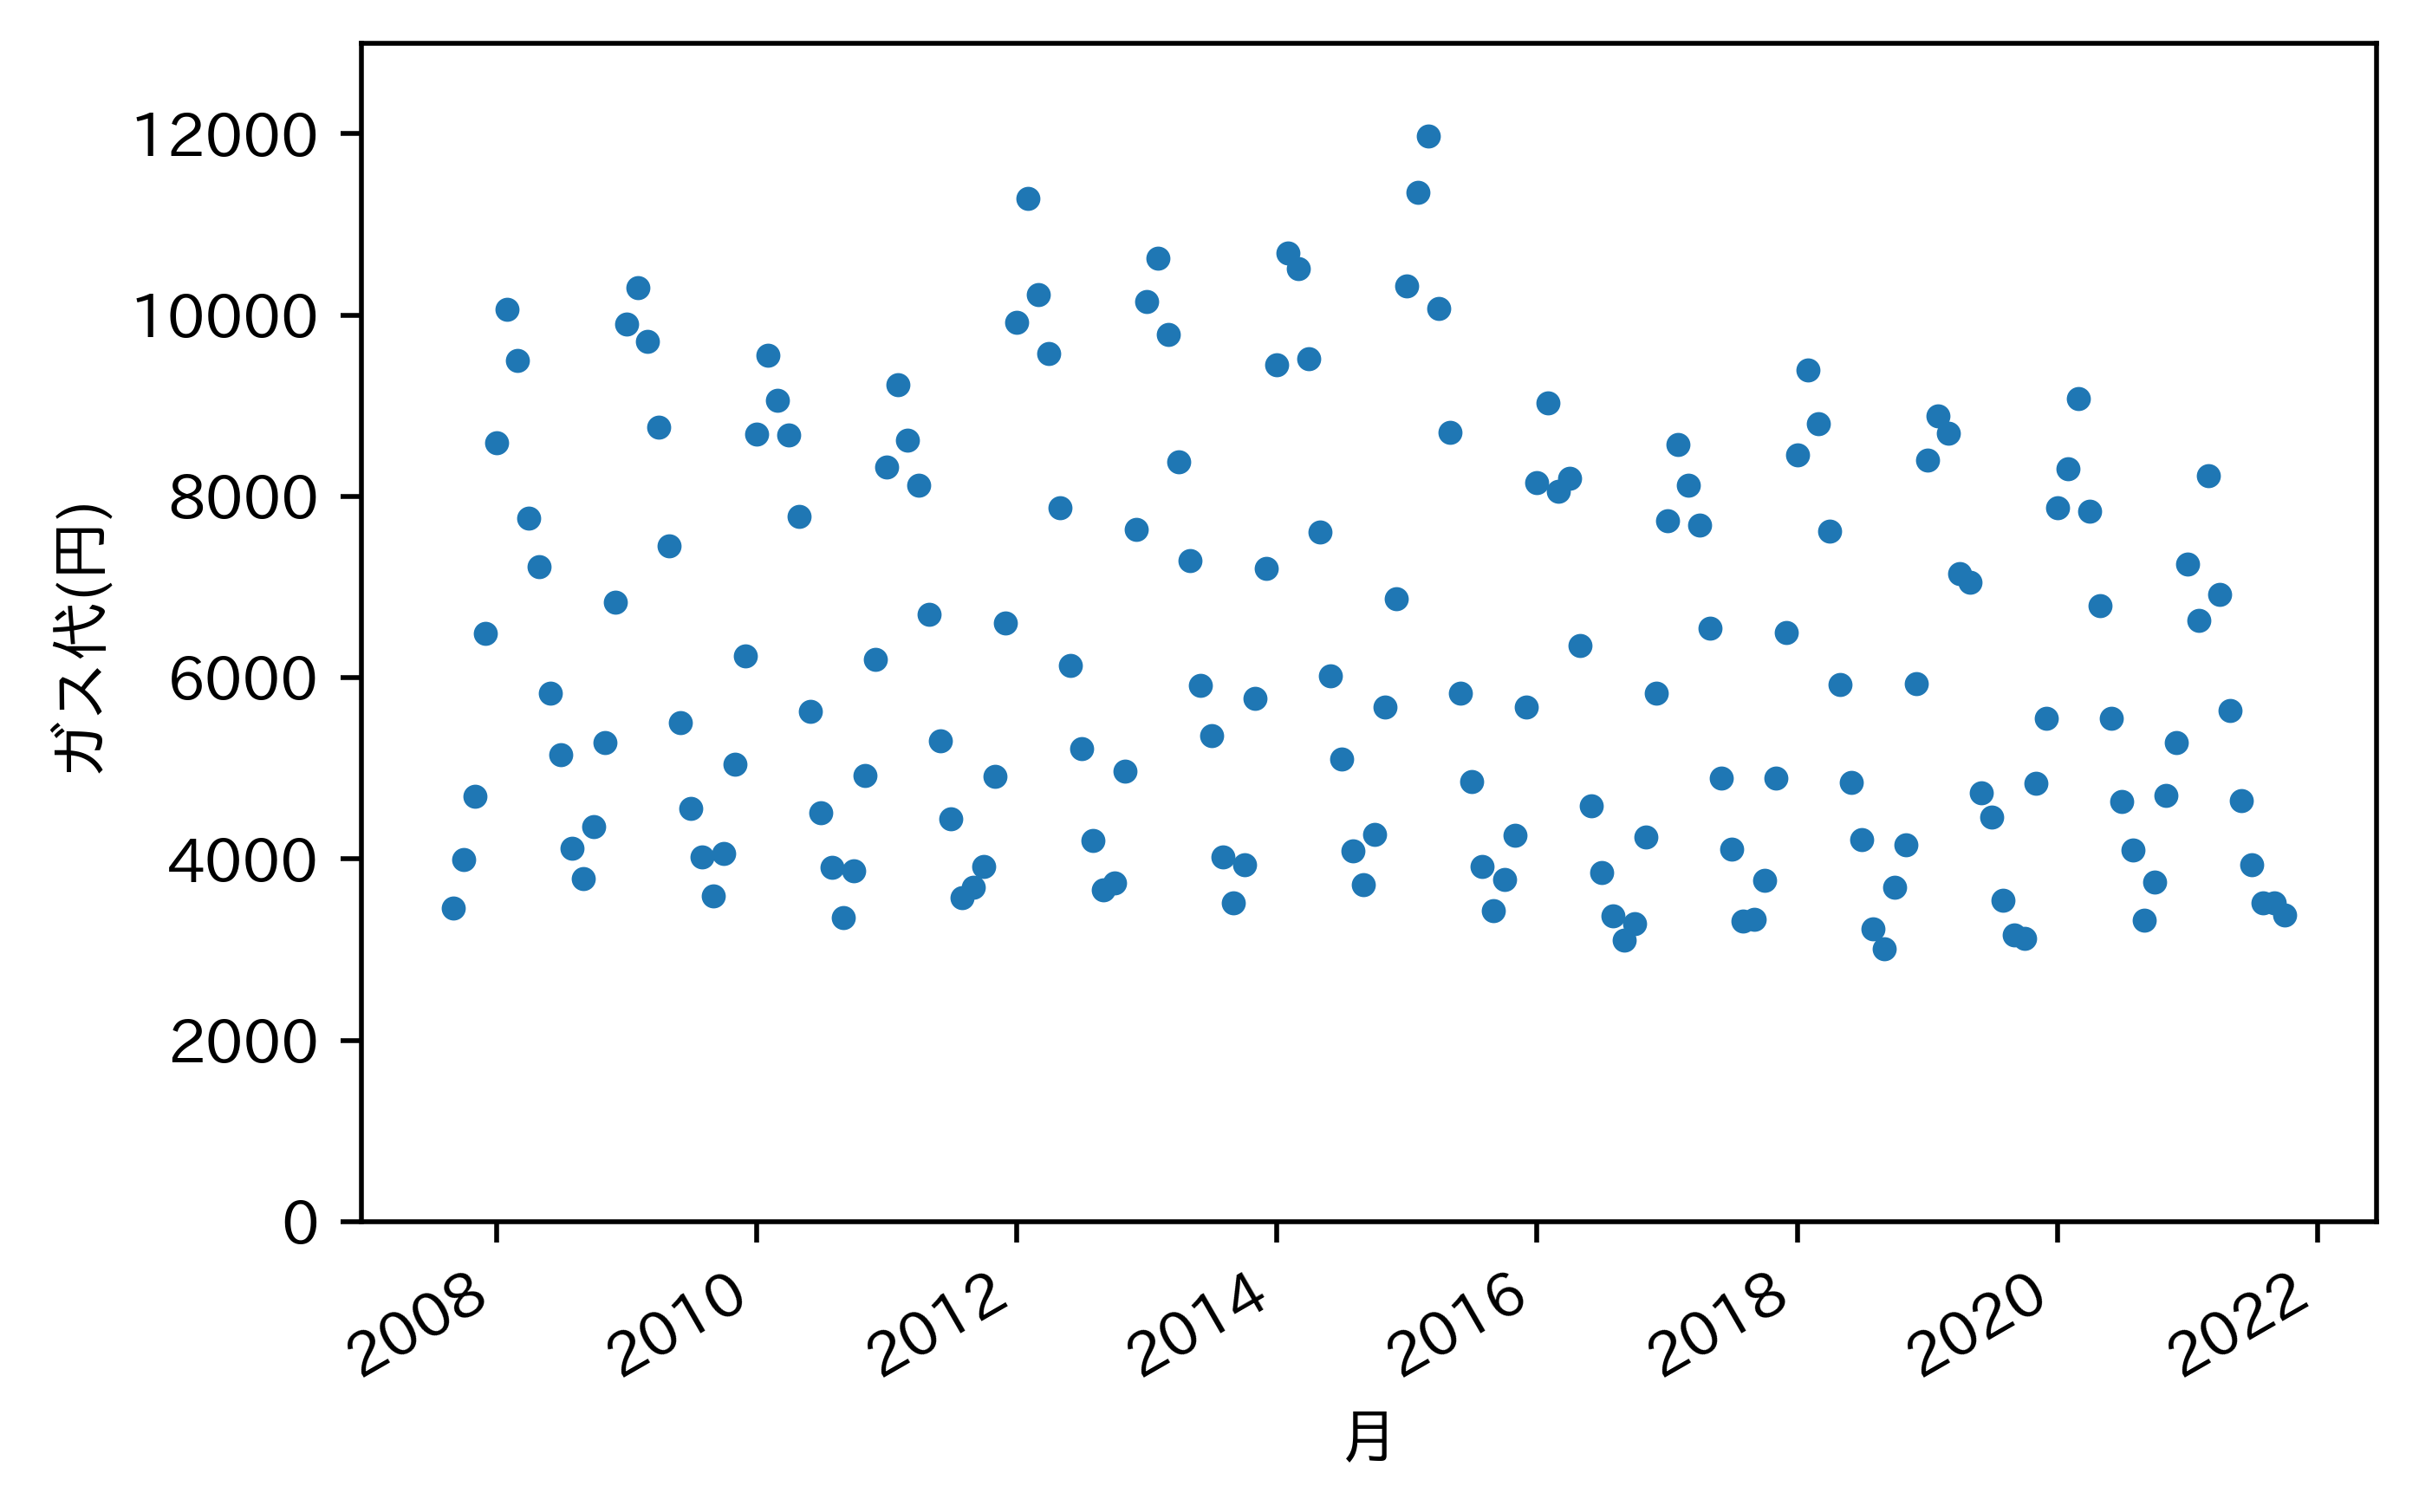

In [ ]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(dpi=500)
ax.set_xlabel("月")
ax.set_ylabel("ガス代(円)")
ax.set_ylim(0, 13000)
plt.gcf().autofmt_xdate() 
ax.scatter(pd.to_datetime(df_merged["年月"]), data[:, 1].reshape(-1, 1), marker=".")
fig.show()

(d)
回帰分析を実行するために、まずRegressionクラスを作成し、その後、回帰分析を行う対象のデータと、次数を引数として渡す。
この次数(degree)は、n次関数による重回帰を行う際のnとして利用される。
また、回帰係数は regression: Regression = Regression(data, degree) の regression.W で求められ、 回帰式は regression.Y_prediction = np.polyval(self.W[::-1], self.X_design) で求められる。

In [ ]:
class Regression():

    def __init__(self, data, degree):
        self.X = data[:, 0].reshape(1, -1)
        # [1, n]の行列に変換
        self.X_design = np.array([np.power(self.X, i) for i in range(degree+1)]).reshape(degree+1, -1).T
        # degree 次関数による重回帰を行いたい
        self.Y = data[:, 1].reshape(-1, 1)
        # [n, 1]の行列に変換
        self.W = np.dot(np.dot(np.linalg.pinv(np.dot(self.X_design.T, self.X_design)), self.X_design.T), self.Y).reshape(-1)
        # (2.25)式を利用する
        self.Y_prediction = np.polyval(self.W[::-1], self.X)
        # numpy.polyval の仕様上の都合から 重みWを反転させておく必要がある
    
    def get_W(self):
        return self.W
    
    def get_R2(self):
        # 式 (2.49) numpy varianceを用いる
        return np.var(self.Y_prediction, ddof=0) / np.var(self.Y, ddof=0)
    
    def plot_graph(self):
        x = np.linspace(-20, 30, 500)
        y = np.polyval(self.W[::-1], x) # 重みベクトルWとベクトルxからyを求める(推測値)
        fig, ax = plt.subplots(dpi=500)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_xlim(-20, 30)
        ax.set_ylim(0, 13000)
        ax.grid()
        ax.scatter(self.X, self.Y, marker=".")
        ax.plot(x, y, "g")
        fig.show()
    
    def plot_data(self):
        fig, ax = plt.subplots(dpi=500)
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_xlim(-20, 30)
        ax.set_ylim(0, 13000)
        ax.grid()
        ax.scatter(self.X, self.Y, marker=".")
        fig.show()

In [ ]:
degree: int
R2: int = 0

for deg in range(6):
    regression: Regression = Regression(data, deg)
    print(regression.get_R2())
    if R2 < regression.get_R2():
        R2 = regression.get_R2()
        degree = deg

print("次数: ", end='')
print(degree)

regression: Regression = Regression(data, degree)

print("回帰式(yの予測値の結果): ", end='')
print(regression.Y_prediction)

print("回帰係数: ", end='')
print(regression.W)

0.0
0.557236700704428
0.5741005678221405
0.5751026264538693
0.575355244593317
0.5773093703687995
次数: 5
回帰式(yの予測値の結果): [[4522.08544976 4990.67959935 6844.14594353 7508.21708223 8186.64633725
  8474.74601147 7471.99927225 6267.16407847 5626.80307683 4893.72152169
  4092.80383699 3993.46013358 4570.57249291 5204.96693388 6557.76212558
  7834.73569742 8444.74767663 7977.97586943 8083.48818896 6588.45943454
  5023.15446311 4554.39683858 3958.95745016 4226.3096478  4211.91165809
  5006.90320629 6557.76212558 8083.48818896 8532.88341617 8560.95446606
  8152.56377697 7977.97586943 5221.89569272 4893.72152169 3973.37666903
  4472.24825054 4813.107691   5606.61172623 6133.17457603 7726.14406776
  8735.45796702 8665.75851243 8118.1691229  6944.35248364 5088.51656965
  5104.96783531 4169.93516822 4018.51418387 4489.85470062 5256.02542324
  6081.66712332 7942.3947017  8713.15050175 8713.15050175 7762.41146679
  6682.27513563 5138.03524913 4602.9463966  4255.63446969 4227.20408575
  4169.93516822 51

(e)
決定係数は、 regression.R2 で求められる。また、回帰で求めたグラフは以下のように表せる。

In [ ]:
regression.get_R2()

0.5773093703687995

/var/folders/wl/l0q5d3r90b375sqc25hk_bsw0000gn/T/ipykernel_84584/3383003949.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


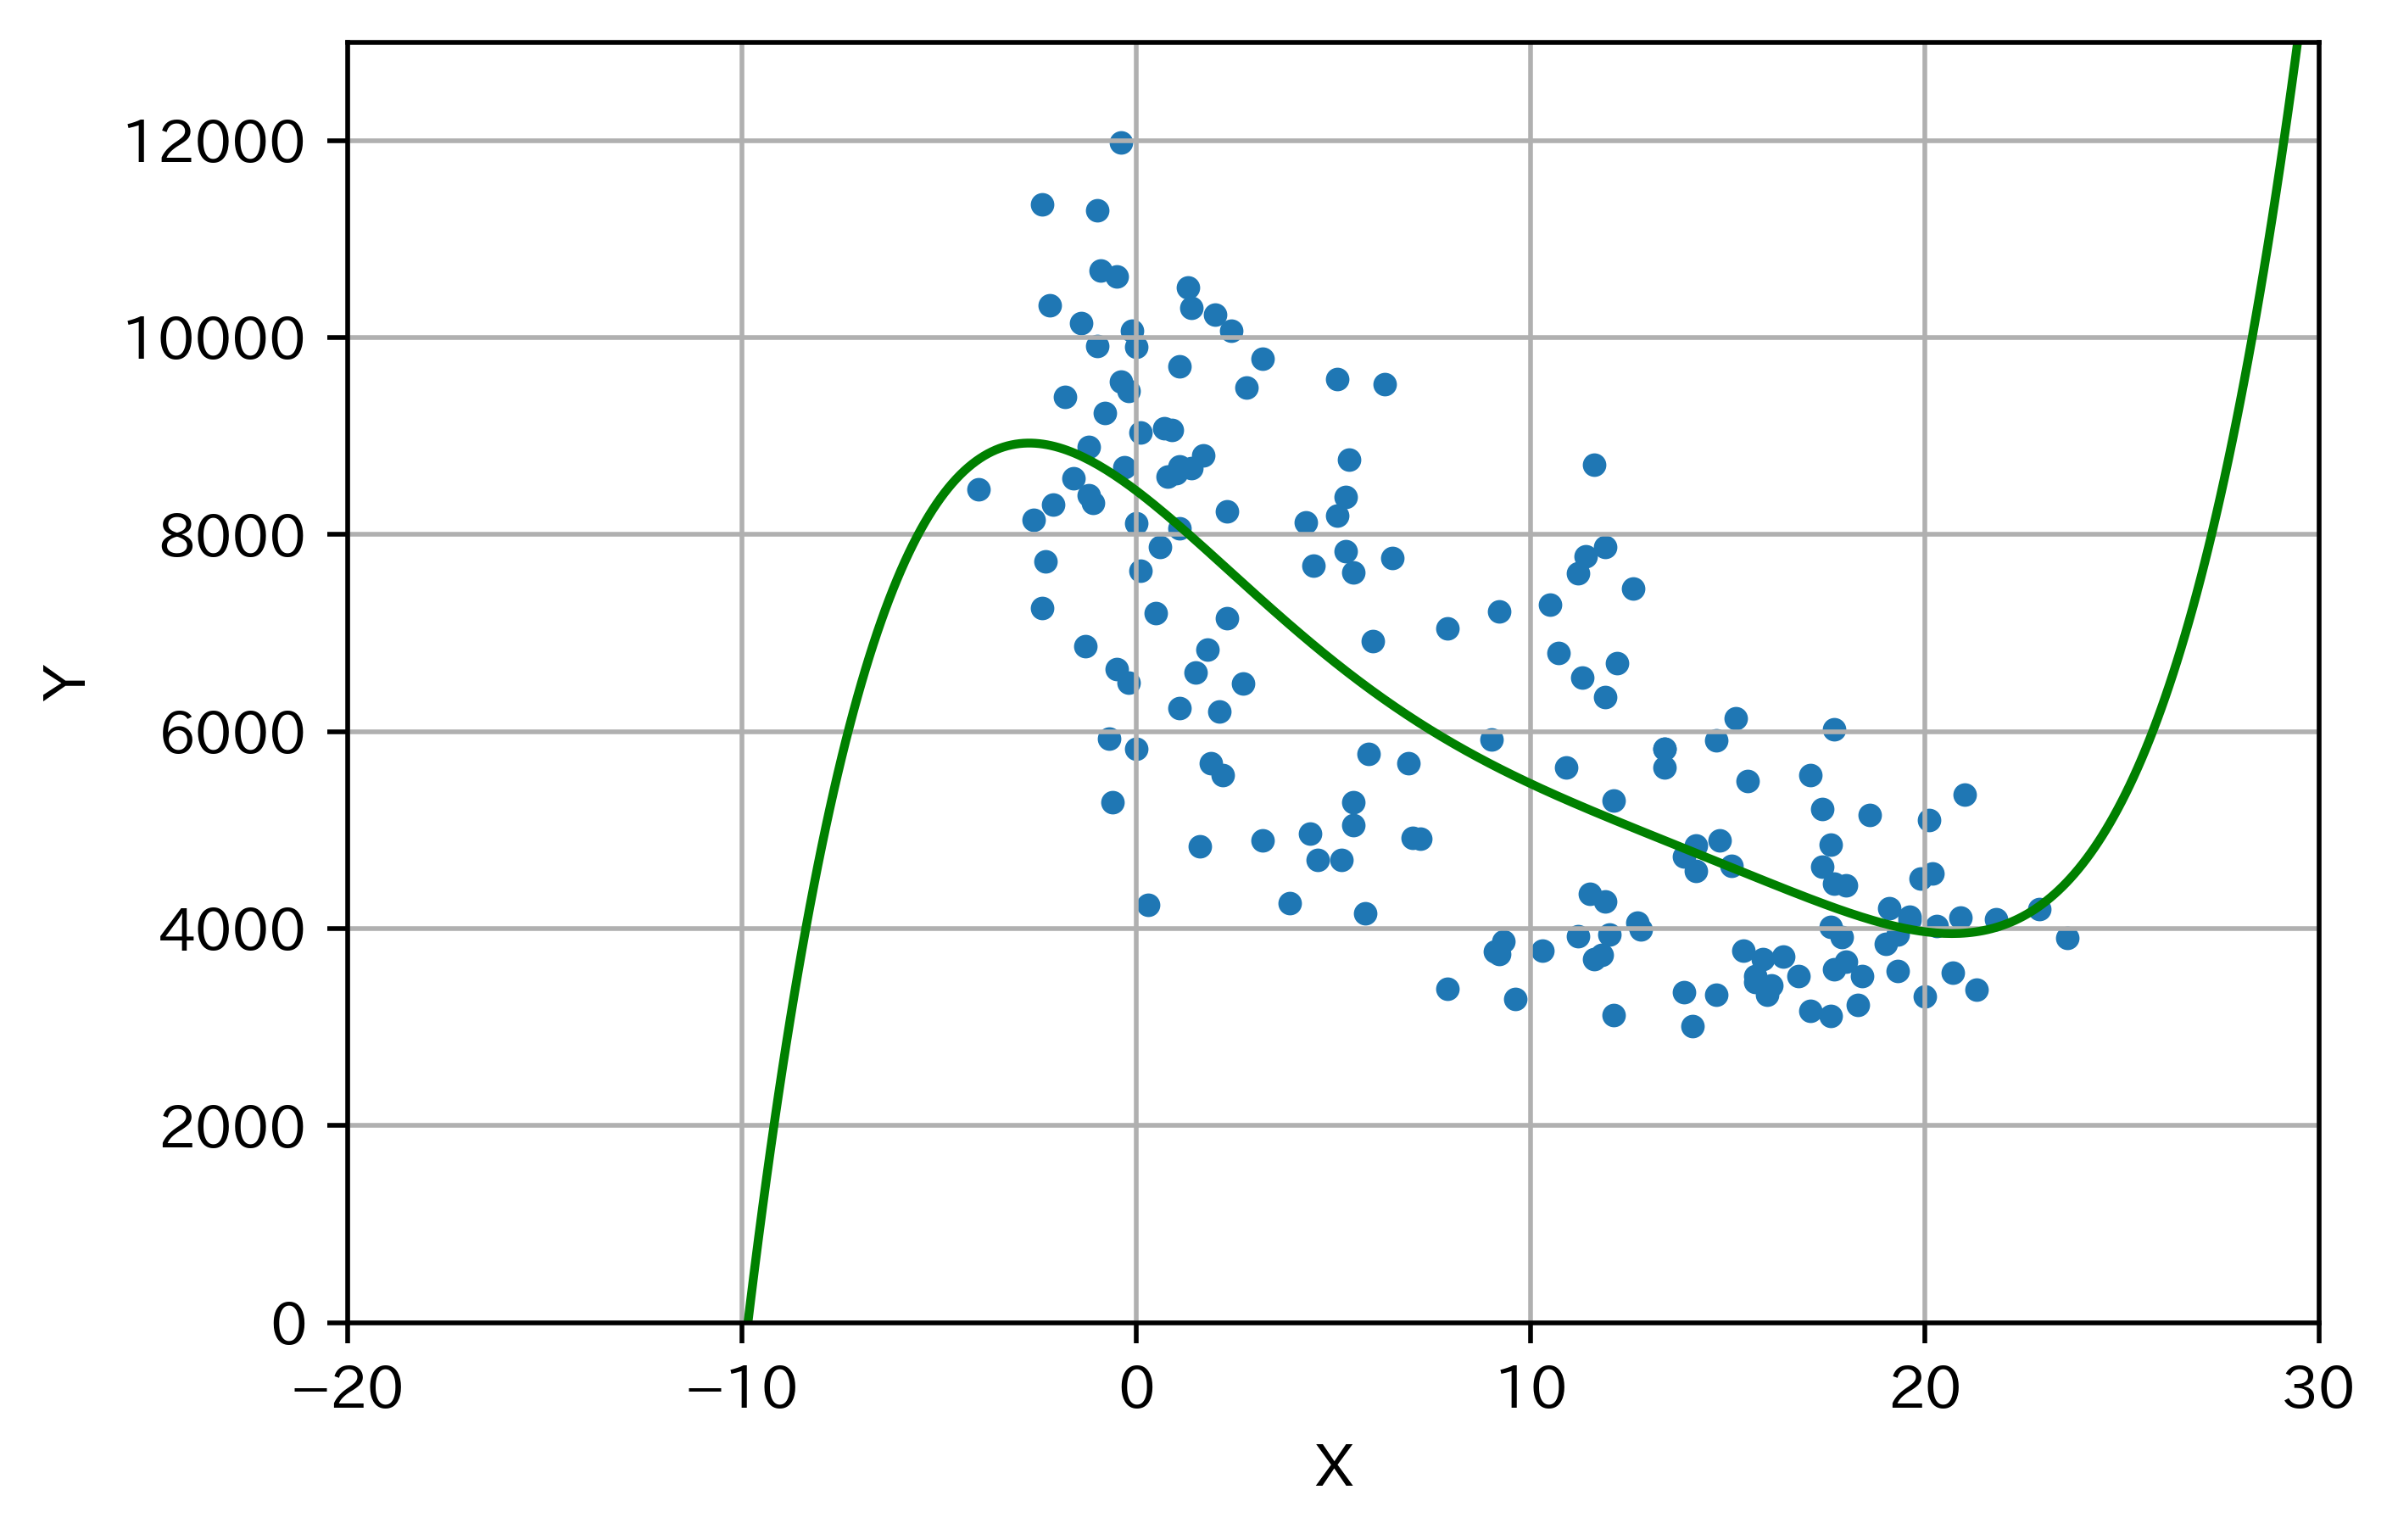

In [ ]:
regression.plot_graph()

(f)
最低気温が低くなれば、暖房のためにガスを消費すると考えられるので、最低気温とガス代に負の相関があることは概ね予想通りであった。
決定係数が
0.557236700704428
0.5741005678221405
0.5751026264538693
0.575355244593317
0.5773093703687995
となっており、どの次数でもあまり高い値をしめさないことは、資源価格（ガスなど）の年度ごとの違いなどが影響していると考えられる。
線形近似と、5次関数による近似との間に決定係数上は大きな違いが見られなかったことから、資源価格の年度ごとの違いがない場合には、ガス代と最低気温には線形の関係があることが窺える。